In [1]:
import numpy as np
from utils import evaluate_model_policy
from trainer import get_trained_model
from environment import StreetFighterEnv
from trainer import _get_model
from stable_baselines3 import PPO, A2C
from actor_critic import A2CCNNPolicy
from feature_extractors import CNNExtractorWithAttention, CNNExtractor
from layers import ActorCriticLayer
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from driver import recorder
matplotlib.rcParams['figure.figsize'] = (10, 10)
%matplotlib inline

In [2]:
# bias_capture_movement = "models/chunli.state_True_True/best_model.zip"
# bias_no_capture_movement = "models/chunli.state_True_False/best_model.zip"
# no_bias_capture_movement = "models/chunli.state_False_True/best_model.zip"
# no_bias_no_capture_movement = "models/chunli.state_False_False/best_model.zip"

In [3]:
bias_capture_movement1 = "experiments/final_models/biased_capture_movement/A2C_CHUNLI.zip"
bias_no_capture_movement1 = "experiments/final_models/biased_no_capture_movement/A2C_CHUNLI.zip"
no_bias_capture_movement1 = "experiments/final_models/unbiased_capture_movement/A2C_CHUNLI.zip"
no_bias_no_capture_movement1 = "experiments/final_models/unbiased_no_capture_movement/A2C_CHUNLI.zip"

In [4]:
rewards = []

# MODEL WITH ATTENTION

In [5]:
reward = recorder(model_path=bias_capture_movement1, capture_movement=True, state='chunli.state', 
         model_name="A2C", render=False, record_dir='/tmp/record')
rewards.append(reward)
reward

model_path: experiments/final_models/biased_capture_movement/A2C_CHUNLI.zip, capture_movement: True, state: chunli.state, model_name: A2C, render: False, record_dir: /tmp/record
iterations:  4350
total reward:  34377.0


34377.0

# MODEL WITH ATTENTION WITHOUT MOVEMENT

In [6]:
reward = recorder(model_path=bias_no_capture_movement1, capture_movement=False, state='chunli.state', 
         model_name="A2C", render=False, record_dir='/tmp/record')
rewards.append(reward)
reward

model_path: experiments/final_models/biased_no_capture_movement/A2C_CHUNLI.zip, capture_movement: False, state: chunli.state, model_name: A2C, render: False, record_dir: /tmp/record
iterations:  5211
total reward:  32392.0


32392.0

# MODEL WITHOUT ATTENTION WITH MOVEMENT

In [7]:
reward = recorder(model_path=no_bias_capture_movement1, capture_movement=True, state='chunli.state', 
         model_name="A2C", render=False, record_dir='/tmp/record')
rewards.append(reward)
reward

model_path: experiments/final_models/unbiased_capture_movement/A2C_CHUNLI.zip, capture_movement: True, state: chunli.state, model_name: A2C, render: False, record_dir: /tmp/record
iterations:  7670
total reward:  29032.0


29032.0

# MODEL WITHOUT ATTENTION WITHOUT MOVEMENT

In [8]:
reward = recorder(model_path=no_bias_no_capture_movement1,  capture_movement=False, state='chunli.state', 
         model_name="A2C", render=False, record_dir='/tmp/record')
rewards.append(reward)
reward

model_path: experiments/final_models/unbiased_no_capture_movement/A2C_CHUNLI.zip, capture_movement: False, state: chunli.state, model_name: A2C, render: False, record_dir: /tmp/record
iterations:  6320
total reward:  17023.0


17023.0

In [9]:
rewards

[34377.0, 32392.0, 29032.0, 17023.0]

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

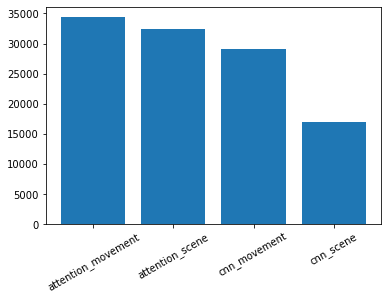

In [10]:
fig, ax = plt.subplots()
ax.bar(['attention_movement', 'attention_scene', 'cnn_movement', 'cnn_scene'], rewards)
plt.xticks(rotation=30)